In [1]:
#import libraires

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset, cleaned and manipulated in Excel due to its structure

df = pd.read_excel("klips.xlsx")

In [3]:
# map and apply cpi ratio

cpi_mapping = {2021: 1, 2020: 124.7/118.7, 2019: 124.7/115.8, 2018: 124.7/115.2, 2017:124.7/113.11}
df['cpi_ratio'] = df['year'].map(cpi_mapping)

In [4]:
# apply cpi ration to normalize income, asset, and monthly loan payment.
# in addition change unit from 10,000 KRW to 1,000,000 KRW for better interpretation

df['n_m_wage'] = round(df['mother_wage']*df['cpi_ratio']*0.01,5)
df['n_f_wage'] = round(df['p_wage']*df['cpi_ratio']*0.01,5)
df['n_h_asset'] = round(df['agg_h_asset']*df['cpi_ratio']*0.01,5)
df['n_monthly_dept'] = round(df['h_debt_pay']*df['cpi_ratio']*0.01,5)

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'hhid', 'pid', 'wave', 'year', 'h_asset_1', 'h_asset_2_1',
       'h_asset_3_1', 'h_debt_pay', 'h_debt_total', 'h_hmarital', 'h_hprice',
       'h_inc_1', 'h_inc_2', 'h_inc_3', 'h_inc_4', 'h_inc_5', 'h_inc_6',
       'h_inc_total', 'h_kidage06', 'h_region', 'h_resid_type', 'p_age',
       'p_econstat', 'p_edu', 'p_employ_type', 'p_hours', 'p_job_status',
       'p_jobtype', 'p_married', 'p_sex', 'p_wage', 'work_support',
       'leave_eli', 'mother_wage', 'mother_age', 'cpi_ratio', 'agg_h_asset',
       'mother_work', 'n_m_wage', 'n_f_wage', 'n_monthly_dept', 'n_h_asset',
       'resid_dummy', 'higher_edu_dummy', 'wplace_dummy', 'job_stat_dummy',
       'leave_days', 'uptake'],
      dtype='object')


In [6]:
# define regressor and regressand

X = df[['p_age','mother_age','n_f_wage','n_m_wage','n_monthly_dept',\
        'n_h_asset' ,'wplace_dummy','job_stat_dummy','higher_edu_dummy','resid_dummy','h_kidage06']]
X = sm.add_constant(X) 
y = df['uptake']

# ols regression (linear probability model 1)

model_OLS_uptake = sm.OLS(y,X).fit()
print(model_OLS_uptake.summary())

                            OLS Regression Results                            
Dep. Variable:                 uptake   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     9.556
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.87e-16
Time:                        13:32:26   Log-Likelihood:                -13.364
No. Observations:                 763   AIC:                             50.73
Df Residuals:                     751   BIC:                             106.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0304      0.096  

In [7]:
# define regressor and regressand

X = df[['n_f_wage','n_m_wage','n_monthly_dept',\
        'wplace_dummy','resid_dummy','h_kidage06']]
X = sm.add_constant(X) 
y = df['uptake']

# ols regression (linear probability model 2)

model_OLS_uptake = sm.OLS(y,X).fit()
print(model_OLS_uptake.summary())

                            OLS Regression Results                            
Dep. Variable:                 uptake   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     17.45
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           5.71e-19
Time:                        13:32:26   Log-Likelihood:                -13.869
No. Observations:                 763   AIC:                             41.74
Df Residuals:                     756   BIC:                             74.20
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0045      0.037     -0.

In [8]:
# define regressor and regressand

X = df[['n_f_wage','n_m_wage','n_monthly_dept',\
        'higher_edu_dummy']]
X = sm.add_constant(X) 
y = df['uptake']

# Logit regression

model_logit_uptake = sm.Logit(y,X).fit()
print(model_logit_uptake.summary())

Optimization terminated successfully.
         Current function value: 0.239144
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 uptake   No. Observations:                  763
Model:                          Logit   Df Residuals:                      758
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                 0.09975
Time:                        13:32:26   Log-Likelihood:                -182.47
converged:                       True   LL-Null:                       -202.69
Covariance Type:            nonrobust   LLR p-value:                 3.515e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3448      0.544     -6.150      0.000      -4.411      -2.279
n_f_wage   

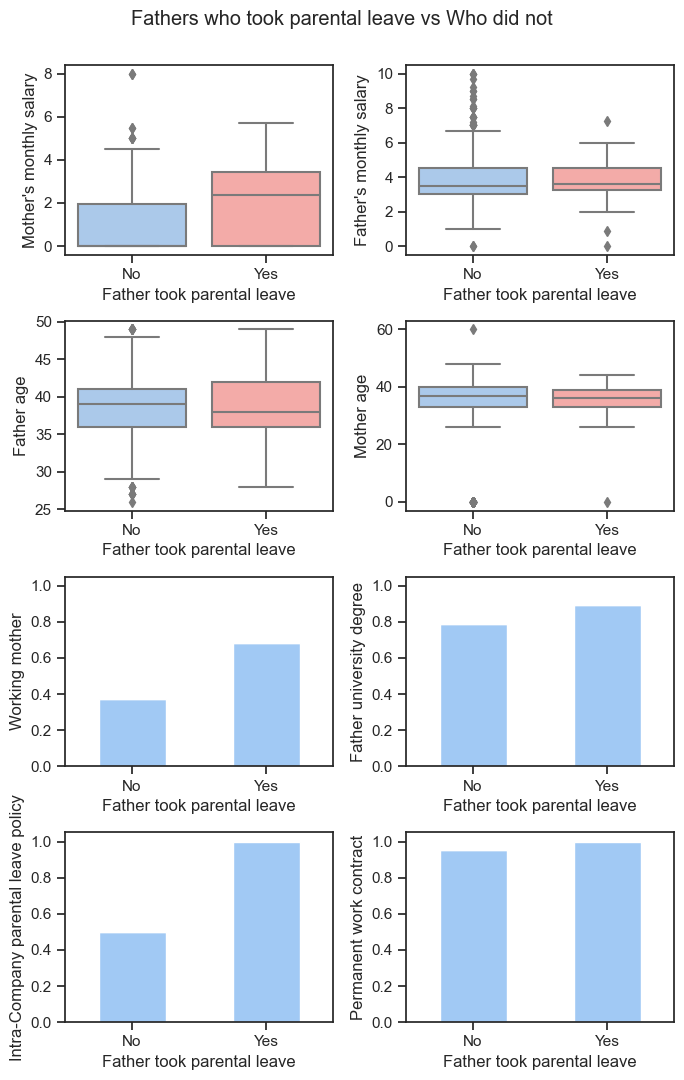

In [9]:
sns.set_theme(style="ticks", palette="pastel")

# Define a mapping from values to labels
value_to_label = {1: 'Yes', 0: 'No'}
df['uptake_label'] = df['uptake'].map(value_to_label)

# Define the functions for creating and showing the plots
def create_and_show_boxplot(x_col, y_col, x_label, y_label, ax):
    sns.boxplot(x=x_col, y=y_col, data=df, palette=['b', 'r'], ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def create_and_show_stacked_barplot(x_col, hue_col, x_label, y_label, ax):
    proportions = df.groupby([x_col, hue_col]).size().unstack(fill_value=0)
    proportions = proportions.divide(proportions.sum(axis=1), axis=0)
    proportions = proportions[[1, 0]]

    ax = proportions.plot(kind='bar', stacked=True, color=['b', 'w'], legend=False, ax=ax)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(7, 11))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Create and show boxplots
create_and_show_boxplot('uptake_label', 'n_m_wage', 'Father took parental leave', "Mother's monthly salary", axes[0])
create_and_show_boxplot('uptake_label', 'n_f_wage', 'Father took parental leave', "Father's monthly salary", axes[1])
create_and_show_boxplot('uptake_label', 'p_age', 'Father took parental leave', 'Father age', axes[2])
create_and_show_boxplot('uptake_label', 'mother_age', 'Father took parental leave', 'Mother age', axes[3])

# Create and show stacked barplots
create_and_show_stacked_barplot('uptake_label', 'mother_work', 'Father took parental leave', 'Working mother', axes[4])
create_and_show_stacked_barplot('uptake_label', 'higher_edu_dummy', 'Father took parental leave', 'Father university degree', axes[5])
create_and_show_stacked_barplot('uptake_label', 'wplace_dummy', 'Father took parental leave', 'Intra-Company parental leave policy', axes[6])
create_and_show_stacked_barplot('uptake_label', 'job_stat_dummy', 'Father took parental leave', 'Permanent work contract', axes[7])


# Adjust layout to prevent overlap
plt.tight_layout()
fig.subplots_adjust(top=.93)
fig.suptitle('Fathers who took parental leave vs Who did not')

# Show the plot
plt.show()